<a href="https://colab.research.google.com/github/willkwon-math/class-for-deeplearning/blob/master/Lecture1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch로 linear regression 모델 구현하기



## Setup

### 필요한 라이브러리 호출

In [1]:
#!pip uninstall numpy
#!pip install numpy
import numpy as np
import torch
import torch.nn as nn

- numpy:
- torch:
- torch.nn: 여러가지 딥러닝 계산을 도와주는 함수들을 가지고 있는 라이브러리. 예로 
  - Nonlinear Activations
  - Convolution Layers
  - Linear Layers
  - Loss Functions
  - Distance Functions


### torch에 대한 기본적인 사항들
- torch.empty(행,열) / 초기화되지 않은 행렬을 생성한다.
- torch.zeros(행,열,dtype) / dtype으로 0으로 채워진 행렬을 생성
- torch.tensor([]) / 데이터로부터 tensor를 생성
- x.size() / 행렬의 크기를 구함.

In [10]:
x = torch.empty(5,3) #초기화되지 않은 5x3 행렬 생성
print(x)
x=torch.rand(5,3) #무작위로 초기화된 행렬을 생성
print(x)
x=torch.zeros(5, 3, dtype=torch.long)
print(x)
x=torch.tensor([5.5, 3])
print(x)
x=torch.zeros(5,3,dtype=torch.long) #행렬크기 구하기
print(x.size())

tensor([[3.1287e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 1.5975e-43],
        [4.4721e+21, 1.5956e+25, 4.7399e+16],
        [3.7987e-39, 6.2706e+22, 4.7428e+30],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])
tensor([[0.2197, 0.3028, 0.9216],
        [0.9160, 0.6648, 0.5344],
        [0.1141, 0.3956, 0.5410],
        [0.8539, 0.9842, 0.8459],
        [0.3744, 0.9717, 0.2179]])
tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
tensor([5.5000, 3.0000])
torch.Size([5, 3])


그 외 기초적인 내용들은 여기서 확인가능 

https://pytorch.org/docs/stable/torch.html

### 데이터 생성

In [2]:
def synthetic_data(w,b, num_examples):
  """Generate y = Xw+b+noise."""
  X = np.random.normal(0,1,(num_examples, len(w)))
  y = np.dot(X, w)+b
  y += np.random.normal(0,0.01, y.shape)
  return X, y.reshape((-1,1))

true_w = np.array([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

print(features.shape, labels.shape)

(1000, 2) (1000, 1)


### numpy(넘파이)의 기초 코드

Numerical Python의 줄임말

In [11]:
data1 = [1,2,3,4,5]
arr1 = np.array(data1)
print(arr1.shape)
arr1

(5,)


array([1, 2, 3, 4, 5])

In [ ]:
arr2 = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(arr2.shape)
arr2


연산은 shape이 같을 때 할 수 있음. broadcast라는 기능 또한 있음


> np.random.normal(mean,standard-deviation,size)
 
- 결과값: ndarray 또는 scalar
- Draw random samples from a normal distribution

In [ ]:
a = np.random.normal(0,1,size=(2,4))
a

> torch.from_numpy(ndarray)

numpy로 입력된 darray 데이터를 pytorch tensor로 변환해줌

In [13]:
a = np.array([1,2,3])
t = torch.from_numpy(a)
print(t)

t[0]=-1
a
print(a)

tensor([1, 2, 3])
[-1  2  3]


## Neural network 생성

### class 모듈 생성

In [3]:
X, y = torch.from_numpy(features).float(),torch.from_numpy(labels).float().reshape(-1,1) #we define it into pytorch tensor

class LinearRegressionModel(torch.nn.Module):
  def __init__(self):
    super(LinearRegressionModel, self).__init__() #check
    self.layer = torch.nn.Linear(2,1,bias=True)#

  def forward(self, inputs):
    outputs = self.layer(inputs)
    return outputs

model = LinearRegressionModel()

### 소스 설명

주로 https://towardsdatascience.com/how-to-build-your-own-pytorch-neural-network-layer-from-scratch-842144d623f6
를 참고함

학습시키기 위한 module을 만들기 위해서는 
- initialization / model = LinearRegressionModel()이 작동할 때 init 파트가 실행된다. initialization을 하는 파트로 처음에 레이어가 초기화 되어야 한다고 함
- forward calculation 부분

이 필요함

> torch.nn.Linear(in_features, out_features, bias=True or False)

- $y=x A^T +b$와 같은 함수를 각 텐서마다 정의함. 

In [14]:
m = nn.Linear(20,30)
input = torch.randn(128, 20)
output = m(input)
print(output.size())

torch.Size([128, 30])


## 학습 시작

Mean square estimate를 최소화하는 방향으로 학습

### 코드

epoch:1, loss:0.000856477243360132
epoch:2, loss:0.000731121574062854
epoch:3, loss:0.000771397550124675
epoch:4, loss:0.000811173755209893
epoch:5, loss:0.00013528336421586573
epoch:6, loss:0.0012850887142121792
epoch:7, loss:0.0002474848588462919
epoch:8, loss:0.0008545509190298617
epoch:9, loss:0.0005554138333536685
epoch:10, loss:0.0010195199865847826


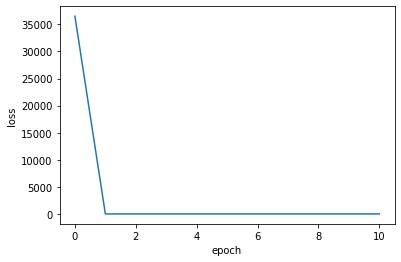

In [4]:
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

def load_array(data_arrays, batch_size, is_train=True):
  dataset = TensorDataset(*data_arrays)
  dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=is_train)

  return dataloader

batch_sizes = 10
num_epochs = 10
data_iter = load_array((X,y), batch_sizes)

criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(),lr=0.03)  #model = LinearRegressionModel()

loss_graph = []
loss_graph.append(criterion(model(X),y))
for epoch in range(num_epochs): #training part epoch: number of learning time 
  for X, y in data_iter:#one step for gradient descent
    predict = model(X)
    loss = criterion(predict, y) #
    optimizer.zero_grad() #gradient zero part
    loss.backward() #use backward function
    optimizer.step()  
  loss_epoch = criterion(model(X),y)
  loss_graph.append(loss_epoch)
  print("epoch:{}, loss:{}".format(epoch+1, loss_epoch))
plt.plot(loss_graph);
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

### 코드 해설

- zero_grad 명령어는 직전 스텝에서 사용된 gradient 파트를 없애줌. 그렇지 않으면 gradient 값들을 계속 축적함.
- loss.backward()는 backpropagation의 parameter의 관점에서 loss function의 도함수를 계산한다.
- optimizer.step()은 optimizer가 작동하도록 하는 명령어. 여기서는 stochastic gradient descent 알고리즘 사용

## 결과


In [5]:
# true_w = np.array([2, -3.4])
# true_b = 4.2
weight = model.layer.weight.detach().numpy()
bias = model.layer.bias.detach().numpy()
print("estimated_w={}".format(weight))
print("estimated_b={}".format(bias))

estimated_w=[[ 1.9993031 -3.400852 ]]
estimated_b=[4.1997533]


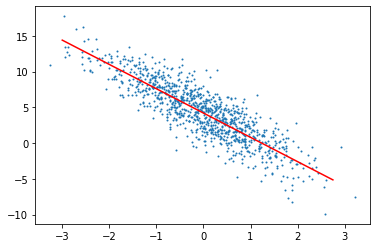

In [7]:
X = np.arange(-3, 3, 0.25)

def predict_plot(input_data, weight, bias):
  weight = weight.reshape(2,1)
  input_data = np.array([np.zeros_like(input_data), input_data])
  input_data = input_data.transpose(1, 0)
  y_hat = np.dot(input_data.reshape(-1, 2), weight) + bias
  return y_hat

y_hat = predict_plot(X, weight, bias)

plt.scatter(features[:,1],labels, 1)
plt.plot(X, y_hat, color='r')
plt.show()